<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

# <font color='navy' size=6>Hierarchical Clustering</font>


In [0]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
 
import pandas as pd
import numpy as np
from pandas import DataFrame

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

# 1) Hierarchical Cluster Introduction

In [68]:
grades = np.array([90, 95, 93,
70, 78, 73,
69, 65, 79,
90, 99, 100,
80, 88, 95,
100, 93, 99,
80, 59, 80,
72, 69, 100,
70, 60, 60])
grades = grades.reshape(9, -1)
grades_df = DataFrame(grades, index = ["John", "Peter", "Adrian", 
                                       "Rene", "Carlos", "Ana", 
                                       "Bert", "Rachel", "Martin"])
grades_df.columns = [["English", "Math", "Science"]]
grades_df

       English Math Science
John        90   95      93
Peter       70   78      73
Adrian      69   65      79
Rene        90   99     100
Carlos      80   88      95
Ana        100   93      99
Bert        80   59      80
Rachel      72   69     100
Martin      70   60      60

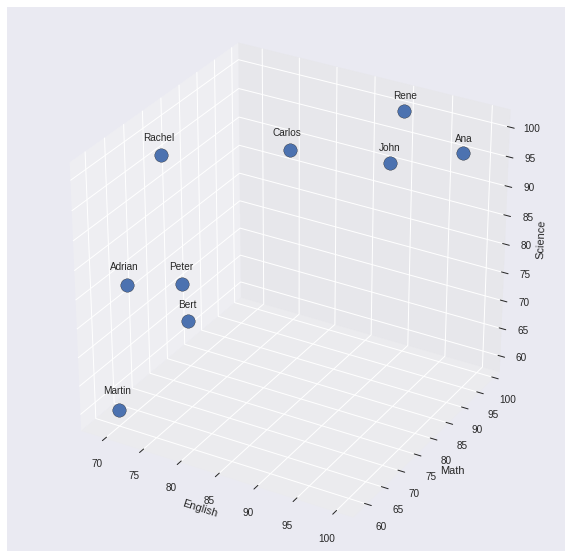

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = grades_df.English, ys = grades_df.Math, zs = grades_df.Science, s= 180, edgecolor = 'black', depthshade = False)
for name, eng, math, sci in grades_df[['English', 'Math', 'Science']].itertuples(index=True, name=None):
    ax.text(eng - len(name)/2 - 0.5, math + 2.5, sci, name)
      
ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')

plt.show()

In [70]:
from sklearn.metrics.pairwise import euclidean_distances
grades_distance_df = DataFrame(euclidean_distances(grades_df))
grades_distance_df.astype(int)

    0   1   2   3   4   5   6   7   8
0   0  33  39   8  12  11  39  32  52
1  33   0  14  39  26  42  22  28  22
2  39  14   0  45  30  46  12  21  19
3   8  39  45   0  15  11  45  34  59
4  12  26  30  15   0  21  32  21  45
5  11  42  46  11  21   0  43  36  59
6  39  22  12  45  32  43   0  23  22
7  32  28  21  34  21  36  23   0  41
8  52  22  19  59  45  59  22  41   0

In [0]:
Z = linkage(grades_df, 'average')

In [72]:
Z

array([[ 0.        ,  3.        ,  8.06225775,  2.        ],
       [ 5.        ,  9.        , 11.76842974,  3.        ],
       [ 2.        ,  6.        , 12.56980509,  2.        ],
       [ 4.        , 10.        , 16.35123467,  4.        ],
       [ 1.        , 11.        , 18.46793984,  3.        ],
       [ 8.        , 13.        , 21.41964939,  4.        ],
       [ 7.        , 14.        , 28.72878851,  5.        ],
       [12.        , 15.        , 40.29393728,  9.        ]])

{'color_list': ['g', 'g', 'g', 'r', 'r', 'r', 'b', 'b'],
 'dcoord': [[0.0, 8.06225774829855, 8.06225774829855, 0.0],
  [0.0, 11.768429738459428, 11.768429738459428, 8.06225774829855],
  [0.0, 16.351234672737036, 16.351234672737036, 11.768429738459428],
  [0.0, 12.569805089976535, 12.569805089976535, 0.0],
  [0.0, 18.467939837839875, 18.467939837839875, 12.569805089976535],
  [0.0, 21.419649389893305, 21.419649389893305, 18.467939837839875],
  [0.0, 28.72878851448013, 28.72878851448013, 21.419649389893305],
  [16.351234672737036,
   40.29393727741506,
   40.29393727741506,
   28.72878851448013]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [13.75, 13.75, 54.375, 54.375]],
 'ivl': ['4', '5', '0', '3', '7', '8', '1', '2', '6'],
 'leaves': [4, 5, 0, 3, 7, 8, 1, 2, 6]}

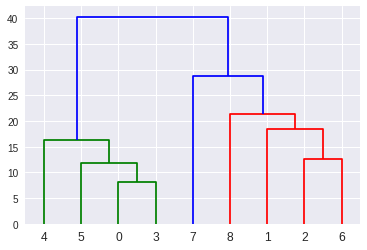

In [73]:
dendrogram(Z)

# 2) Hierarchical Cluster Advanced

In [74]:
grades = np.array([90, 95, 93,
70, 78, 73,
69, 79, 79,
90, 99, 100,
80, 60, 95,
100, 93, 99,
80, 59, 80,
74, 45, 80,
95, 93, 99,
40, 59, 70,
100, 60, 60,
89, 83, 100,
35, 50, 60,
100, 95, 91,
70, 68, 67,
40, 56, 80,
44, 57, 73,
90, 60, 70,
41, 52, 72,
70, 80, 100,
77, 89, 100,
72, 91, 100,
90, 60, 60])
grades = grades.reshape(23, -1)
grades_df = DataFrame(grades, index = ["John", "Peter", "Adrian", "Rene", "Carlos",
                                       "Ana", "Bert", "Rachel", "Martin", "Marina",
                                       "Aspen", "Dart", "Josh", "Ken", "Ron",
                                       "Susan", "Marta", "Fabian", "Albert",
                                        "Carl","Hector", "Nancy", "Sabrina"])
grades_df.columns = [["English", "Math", "Science"]]
grades_df

        English Math Science
John         90   95      93
Peter        70   78      73
Adrian       69   79      79
Rene         90   99     100
Carlos       80   60      95
Ana         100   93      99
Bert         80   59      80
Rachel       74   45      80
Martin       95   93      99
Marina       40   59      70
Aspen       100   60      60
Dart         89   83     100
Josh         35   50      60
Ken         100   95      91
Ron          70   68      67
Susan        40   56      80
Marta        44   57      73
Fabian       90   60      70
Albert       41   52      72
Carl         70   80     100
Hector       77   89     100
Nancy        72   91     100
Sabrina      90   60      60

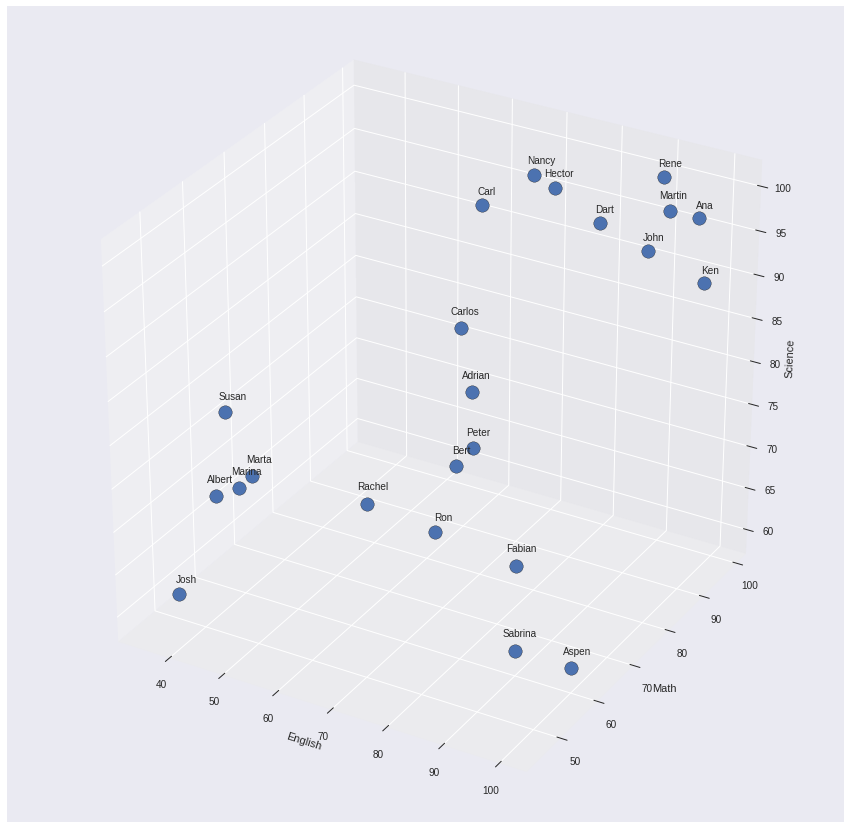

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = grades_df.English, ys = grades_df.Math, zs = grades_df.Science, s= 180, edgecolor = 'black', depthshade = False)
for name, eng, math, sci in grades_df[['English', 'Math', 'Science']].itertuples(index=True, name=None):
    ax.text(eng - len(name)/2 - 0.5, math + 2.5, sci, name)

ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')

plt.show()

In [76]:
from sklearn.metrics.pairwise import euclidean_distances
grades_distance_df = DataFrame(euclidean_distances(grades_df))
grades_distance_df.astype(int)

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22
0    0  33  29   8  36  11  39  54   8  65  49  13  78  10  42  64  62  41  68  25  15  19  48
1   33   0   6  39  30  42  22  33  39  35  37  33  46  38  11  37  33  27  38  27  29  30  29
2   29   6   0  35  27  39  22  34  35  36  41  29  48  36  16  37  33  29  39  21  24  24  34
3    8  39  35   0  40  11  45  59   7  70  56  16  83  14  49  68  67  49  73  27  16  19  55
4   36  30  27  40   0  38  15  22  36  47  40  25  57  40  30  42  42  26  45  22  29  32  36
5   11  42  39  11  38   0  43  57   5  74  51  14  87   8  50  73  71  45  76  32  23  28  52
6   39  22  22  45  15  43   0  15  41  41  28  32  50  42  18  40  36  14  40  30  36  38  22
7   54  33  34  59  22  57  15   0  55  38  36  45  44  57  26  35  33  24  34  40  48  50  29
8    8  39  35   7  36   5  41  55   0  70  51  11  83   9  47  68  67  44  72  28  18  23  51
9   65  35  36  70  47  74  41  38  70   0  60  62

# 3) Dendrograms

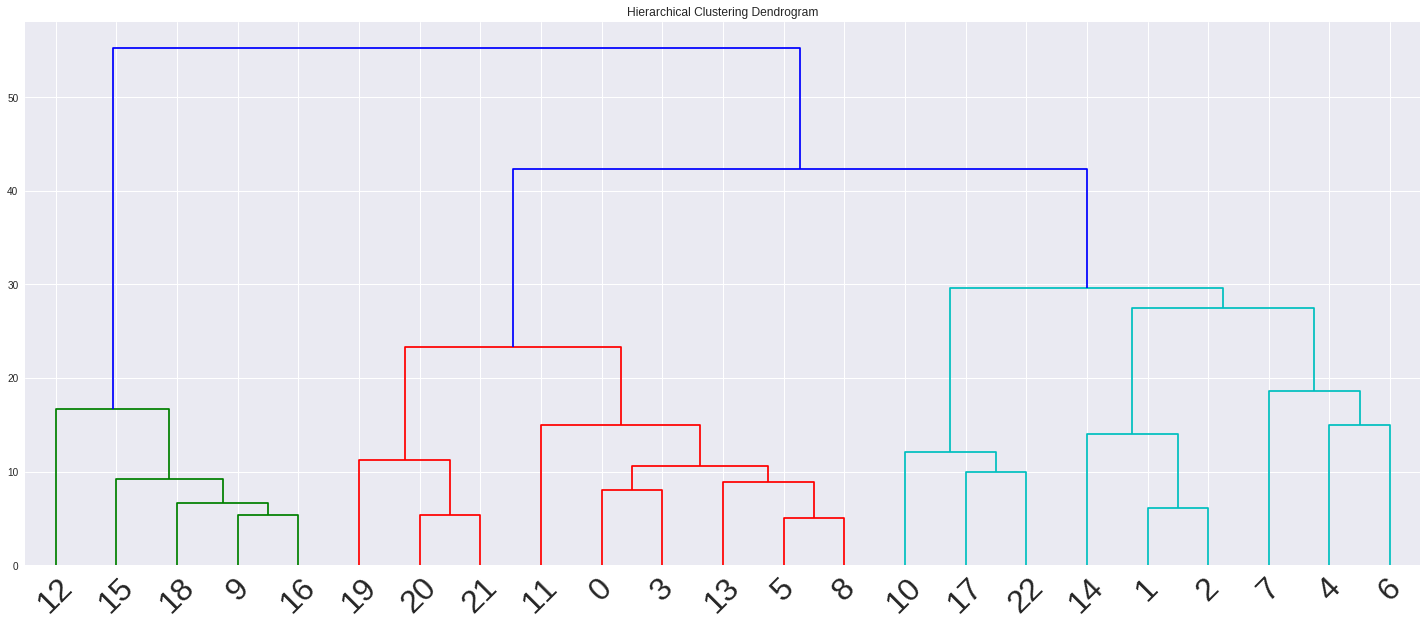

In [77]:

Z = linkage(grades_df, 'average')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 32.)
plt.show()

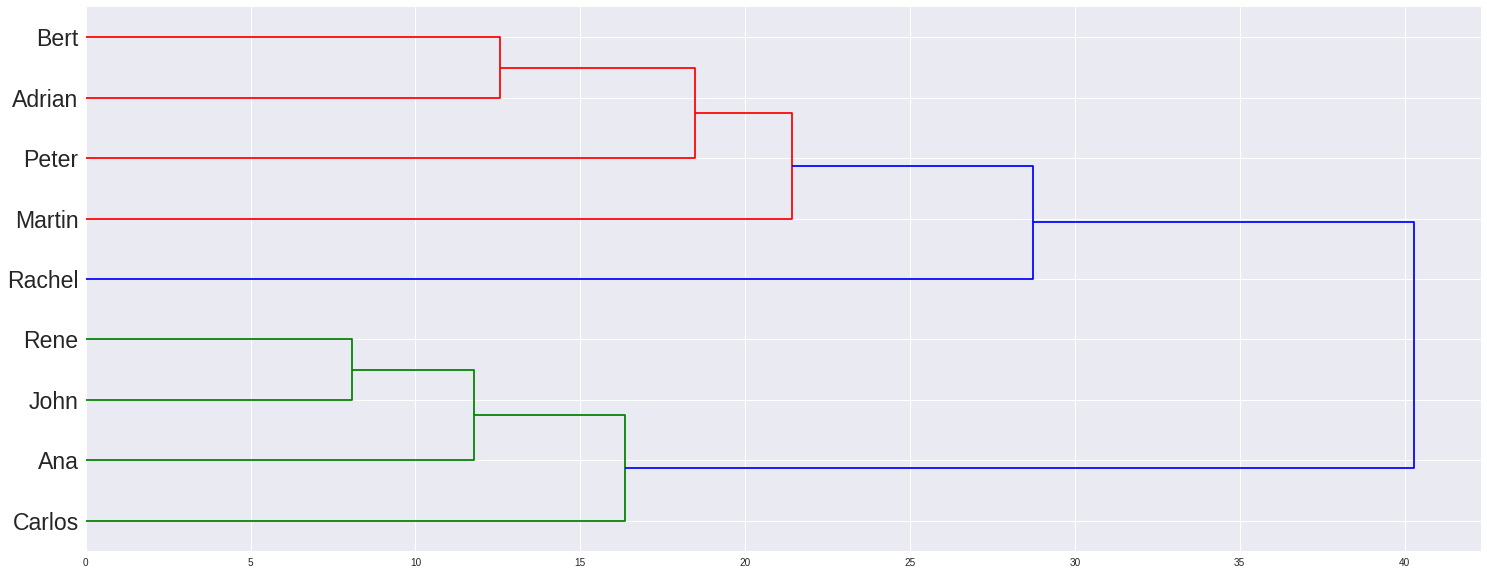

In [57]:
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=23, 
               labels = grades_df.index)


# 5) Plotting

### Plotting Clusters with k = 3

In [58]:
from scipy.cluster.hierarchy import fcluster
k=3
dend_clusters = fcluster(Z, k, criterion='maxclust')
dend_clusters

array([1, 2, 2, 1, 1, 1, 2, 3, 2], dtype=int32)

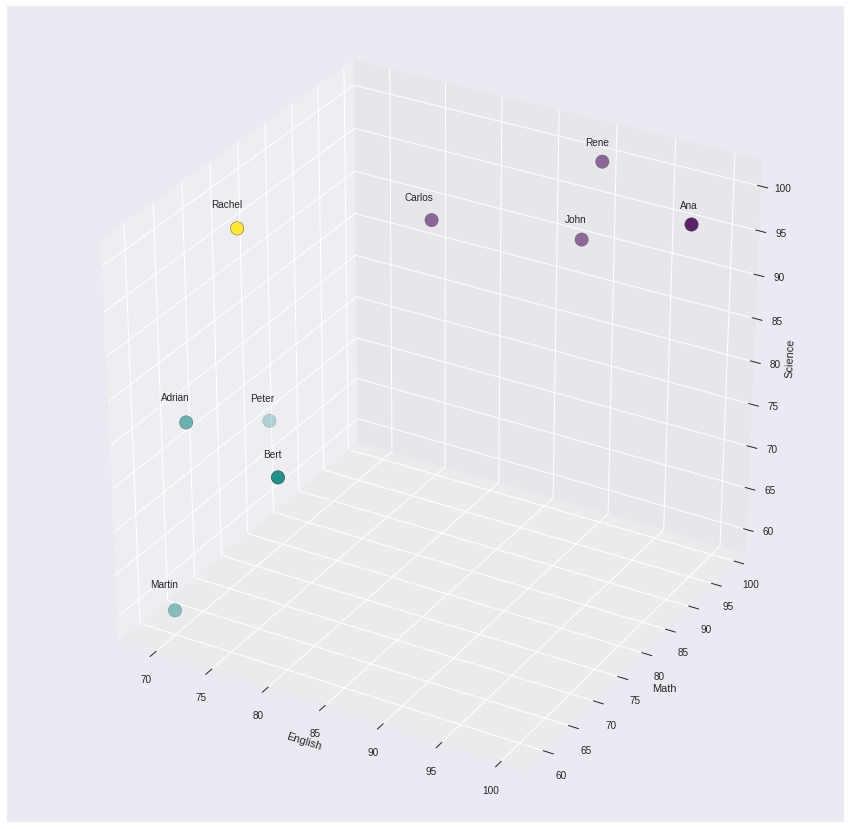

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = grades_df.English, ys = grades_df.Math, zs = grades_df.Science, c = dend_clusters, cmap='viridis',
           s = 180, edgecolor = 'black', depthshade = True)

for name, eng, math, sci in grades_df[['English', 'Math', 'Science']].itertuples(index=True, name=None):
    ax.text(eng - len(name)/2 - 0.5, math + 2.5, sci, name)


ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')

plt.show()

### Plotting Clusters with k = 5

In [64]:
from scipy.cluster.hierarchy import fcluster
k = 5
dend_clusters = fcluster(Z, k, criterion = 'maxclust')
dend_clusters

array([1, 3, 2, 1, 1, 1, 2, 5, 4], dtype=int32)

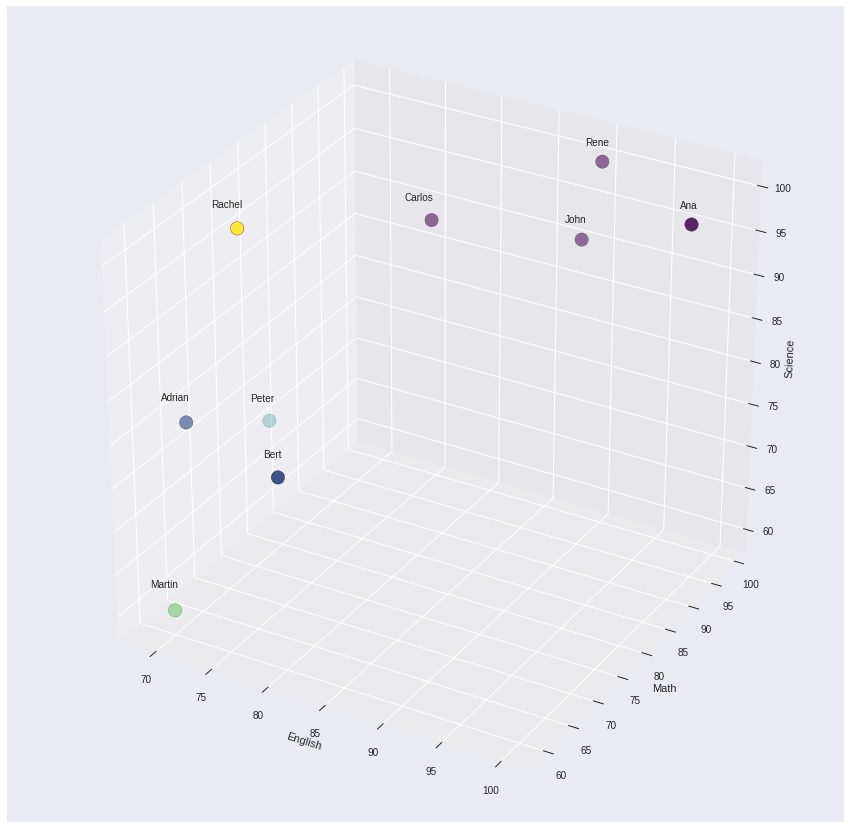

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = grades_df.English, ys = grades_df.Math, zs = grades_df.Science, c = dend_clusters, cmap='viridis',
           s = 180, edgecolor = 'black', depthshade = True)

for name, eng, math, sci in grades_df[['English', 'Math', 'Science']].itertuples(index=True, name=None):
    ax.text(eng - len(name)/2 - 0.5, math + 2.5, sci, name)
    
ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')

plt.show()